# Introduction to SciKit-Learn (sklearn)

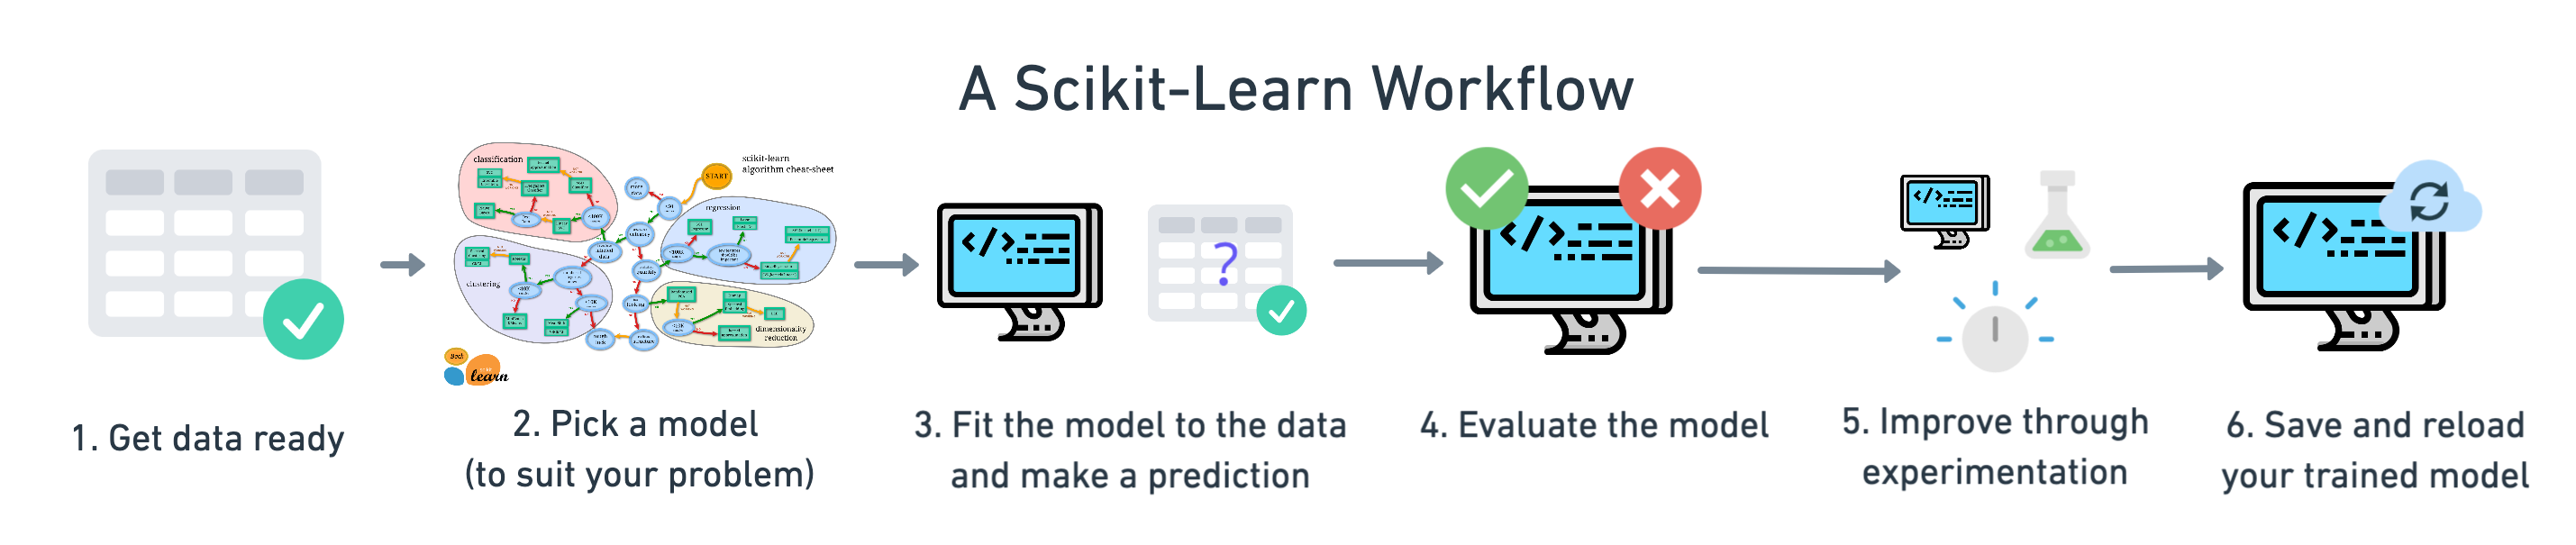

What's covered in this notebook:

0. End-to-End SciKit-Learn workflow
1. Getting the data ready<br>
    1.1 Making the data numerical (using `Pandas`)<br>
    1.2 Handling missing values (using `scikit-learn`)
2. Choose the right estimator/algorithm/model for out problems<br>
    2.1 Picking a machine learning model for a regression model<br>
    2.2 Picking a machine learning model for a classification model
3. Fit the model/algorithm and use it to make predictions<br>
    3.1 Fiting the model to the data<br>
    3.2 Make predictions using a machine learning model (trained model!)
4. Evaluate the model<br>
    4.1 Evaluating a model with the .score() method<br>
    4.2 Evaluating a model with the scoring parameter (cross-validation)
    
**I covered until here:
continue watching: https://www.udemy.com/course/complete-machine-learning-and-data-science-zero-to-mastery/learn/lecture/17394524#overview**

---

5. Improve the model
6. Save and load a trained model
7. Putting it all together

## 0. End-to-End SciKit-Learn workflow

Three main things we have to do on the data:

- Split the data into `features` and `labels` (usually `X` & `Y`)
- Filling/Imputing or disregarding missing values    
- Converting non-numerical values to numerical values (aka `feature encoding`)

In [15]:
# Imports
import pandas as pd

In [16]:
# 1. Get the data ready

# The target column is whether the patient has heart disease or not - that's what we're predicting
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
# Create X (Features metrix) - every column without the target we're trying to predict
X = heart_disease.drop("target", axis=1) # axis=1 in Pandas
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [18]:
# Create Y (labels) - the target column we're trying to predict
y = heart_disease["target"]

In [19]:
y.head() # Notice how the results match the target from above

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [20]:
# Split the data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [22]:
X_train.head() # The training set which we use to train the model

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1
213,61,0,0,145,307,0,0,146,1,1.0,1,0,3
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2


In [23]:
X.shape[0] * 0.8

242.4

In [24]:
len(heart_disease)

303

In [25]:
242 + 61 # The total amount of our records

303

In [26]:
# 2. Choose the right model and hyperparameters
# The author chose to use Random Foresst Classifier because he studied that this model would be appropriate
# for this case. Essentially ML is about studying which models are appropriate to be used on which data.
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# Keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [27]:
clf.fit(X_train, y_train);

In [29]:
import numpy as np
# Make a prediction - This should fail!!!
y_label = clf.predict(np.array([0, 2, 3, 4]))
# Expected 2D array, got 1D array instead

# The error points that our test array -- created with numpy -- does not look like the ones we trained the model on.
# We should be able to create a pandas DataFrame which would looks like X_train and feed it into the model.
# Good exercise!!

/home/master/.pyenv/versions/miniconda3-latest/envs/pandas/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [30]:
# That's why we need to use our test set X_test to make predictions and evaluate our model.
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2
258,62,0,0,150,244,0,1,154,1,1.4,1,0,2
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3


In [31]:
y_preds = clf.predict(X_test) # predictions array from the model
y_preds # Len 61

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1])

In [32]:
y_test # Let 61

189    0
286    0
44     1
140    1
151    1
      ..
179    0
57     1
258    0
260    0
45     1
Name: target, Length: 61, dtype: int64

In [33]:
# 4. Evaluate the model

# Train data is the data the algorithm has been trained on, so expect 100% accuracy.
clf.score(X_train, y_train)

1.0

In [34]:
# Test data is the data used for evaluating the model, so it hasn't seen this data yet.
clf.score(X_test, y_test)

0.7868852459016393

In [35]:
# More metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79        30
           1       0.80      0.77      0.79        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [36]:
confusion_matrix(y_test, y_preds) # https://en.wikipedia.org/wiki/Confusion_matrix

array([[24,  6],
       [ 7, 24]])

In [37]:
accuracy_score(y_test, y_preds)

0.7868852459016393

In [38]:
# 5. Improve a model
# Try different amount of n_estimators (hyperparameters)
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train);
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print("---")

Trying model with 10 estimators...
Model accuracy on test set: 80.33%
---
Trying model with 20 estimators...
Model accuracy on test set: 83.61%
---
Trying model with 30 estimators...
Model accuracy on test set: 80.33%
---
Trying model with 40 estimators...
Model accuracy on test set: 78.69%
---
Trying model with 50 estimators...
Model accuracy on test set: 78.69%
---
Trying model with 60 estimators...
Model accuracy on test set: 80.33%
---
Trying model with 70 estimators...
Model accuracy on test set: 78.69%
---
Trying model with 80 estimators...
Model accuracy on test set: 78.69%
---
Trying model with 90 estimators...
Model accuracy on test set: 80.33%
---


In [39]:
# 6. Save the model and load it
import pickle

pickle.dump(clf, open("models/random_forest_model_1.pkl", "wb"))

In [40]:
# Load the model
loaded_model = pickle.load(open("models/random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.8032786885245902

----

## 1. Getting the data ready

This section is all about preparing the data to be handled by our models.

### 1.1 Making the data numerical

ML algorithms -- and computers in general -- are good with handling numbers thus it makes sense to convert our data to numberes before we fit out models on them.

In [41]:
car_sales_data = pd.read_csv("../data/car-sales-extended.csv")
car_sales_data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [42]:
car_sales_data.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

We are going to try to predict the price of the car based on its features.

In [43]:
# Split the data into X/y - always step
X = car_sales_data.drop("Price", axis=1)
y = car_sales_data["Price"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
# Build a ML model
# Again the instructor chooses to use an algorithms they're already familiar with and knows it should perform
# well on the type of data we're dealing with. Additionally, the algorithm is best used to predict numerical
# data instead of binary as above.

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train) # We expect this to fail because our data is not prepped to be used by this algorithm - contains strings.
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Honda'

In [45]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [46]:
# So, we're going to convet our data to numerical

# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# We decide to use Doors as a category to classify our cars as 3-door, 4-door, 5-door cars
categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")

# This is going to be the data of X (from above) transformed into numerical values
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [47]:
# The Make, Colour and Door are now categories (One hot encoded), but the Odometer column has not changed!
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [48]:
dummies = pd.get_dummies(car_sales_data[["Make", "Colour", "Doors", "Odometer (KM)"]])
dummies # Compare this with the original car_sales_data and see that the entries have been categorized

,Doors,Odometer (KM),Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,35431,False,True,False,False,False,False,False,False,True
1,5,192714,True,False,False,False,False,True,False,False,False
2,4,84714,False,True,False,False,False,False,False,False,True
3,4,154365,False,False,False,True,False,False,False,False,True
4,3,181577,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,4,35820,False,False,False,True,True,False,False,False,False
996,3,155144,False,False,True,False,False,False,False,False,True
997,4,66604,False,False,True,False,False,True,False,False,False
998,4,215883,False,True,False,False,False,False,False,False,True


In [49]:
# NOw that the data is all numerical, we refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [50]:
model.score(X_test, y_test) # Ignore the accuracy, the idea is to focus on data transformation.

0.3235867221569877

### 1.2 Handling missing values

What if our data has missing values?

1. Fill them with some value (imputation).
2. Remove the samples with the missing data.

There's no good way to remove missing data.

In [78]:
# Import car sales missing data
car_sales_missing  = pd.read_csv("../data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [79]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [80]:
# Create X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [81]:
# Let's convert our data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

# This says: Apply one-hot-encoding to the categorical_features on the DataFrame
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough",
                                  sparse_threshold=0) # Return a sparse matrix or not!

transformed_X = transformer.fit_transform(X)
transformed_X # The transformation works just fine.

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [83]:
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

# Fit and score a model
model = RandomForestRegressor()
model.fit(X_train, y_train) # Fitting a model should fail because of NaN values
model.score(X_test, y_test)

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

#### Option 1: fill missing data with Pandas

In this section we use `Pandas` to fill missing data.

In [84]:
# Amount of doors an average car has
car_sales_missing["Doors"].value_counts() # guesstimation

Doors
4.0    811
5.0     75
3.0     64
Name: count, dtype: int64

In [85]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Door" column
car_sales_missing["Doors"].fillna(4, inplace=True)

car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [86]:
# Remove rows with missing price value
car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [87]:
#So, we lost some data by removing the missing rows.
len(car_sales_missing)

950

In [89]:
X_missing = car_sales_missing.drop("Price", axis=1)
y_missing = car_sales_missing["Price"]

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough",
                                  sparse_threshold=0) # Return a sparse matrix or not

transformed_X_missing = transformer.fit_transform(X_missing)
transformed_X_missing

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [96]:
# Convert to Pandas DataFrame
pd.DataFrame(transformed_X_missing)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0


In [95]:
dummies = pd.get_dummies(car_sales_missing[["Make", "Colour", "Doors", "Odometer (KM)"]])
dummies

,Doors,Odometer (KM),Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Make_missing,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Colour_missing
0,4.0,35431.0,False,True,False,False,False,False,False,False,False,True,False
1,5.0,192714.0,True,False,False,False,False,False,True,False,False,False,False
2,4.0,84714.0,False,True,False,False,False,False,False,False,False,True,False
3,4.0,154365.0,False,False,False,True,False,False,False,False,False,True,False
4,3.0,181577.0,False,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4.0,35820.0,False,False,False,True,False,True,False,False,False,False,False
996,3.0,155144.0,False,False,False,False,True,False,False,False,False,True,False
997,4.0,66604.0,False,False,True,False,False,False,True,False,False,False,False
998,4.0,215883.0,False,True,False,False,False,False,False,False,False,True,False


In [102]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X_missing, y_missing, test_size=0.2)

# Fit and score a model
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test) # Now the model works because we removed the missing - NaN - data

0.22011714008302485

Extension: Feature Scaling
Once your data is all in numerical format, there's one more transformation you'll probably want to do to it.

It's called **Feature Scaling**.

In other words, making sure all of your numerical data is on the same scale.

For example, say you were trying to predict the sale price of cars and the number of kilometres on their odometers varies from `6,000` to `345,000` but the median previous repair cost varies from `100` to `1,700`. A machine learning algorithm may have trouble finding patterns in these wide-ranging variables.

To fix this, there are two main types of feature scaling.

**Normalization (also called min-max scaling)** - This rescales all the numerical values to between 0 and 1, with the lowest value being close to 0 and the highest previous value being close to 1. Scikit-Learn provides functionality for this in the MinMaxScalar class, see https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

**Standardization** - This subtracts the mean value from all of the features (so the resulting features have 0 mean). It then scales the features to unit variance (by dividing the feature by the standard deviation). Scikit-Learn provides functionality for this in the StandardScalar class, see https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

A couple of things to note.

Feature scaling usually isn't required for your target variable.

**Feature scaling is usually not required with tree-based models** (e.g. Random Forest) since they can handle varying features.

Extra reading

Feature Scaling why is it required? - https://medium.com/@rahul77349/feature-scaling-why-it-is-required-8a93df1af310

Feature Scaling with Scikit-Learn - https://benalexkeen.com/feature-scaling-with-scikit-learn/

Feature Scaling for Machine Learning: Understanding the Difference Between Normalization vs. Standardization - https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

#### Option 2: fill missing values with Scikit-Learn

In this section we use `SciKit-Learn` to fill missing data.
So, it's an alternative to `Option 1`.

In [103]:
car_sales_missing = pd.read_csv("../data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [104]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [106]:
# Get rid of rows without values
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [113]:
car_sales_missing.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [109]:
# Split into X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [118]:
# Fill missing values using Scikit-Learn
# (Notice: we already dropped the rows with missing prices and then split into X & y.)
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (Something that fill missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [115]:
# Reassignment
car_sales_filled = pd.DataFrame(filled_X, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [116]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [119]:
# Again we convert out data to numerical and fit a model.
# Turn categories into numbers.

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough",
                                  sparse_threshold=0) # Return a sparse matrix or not

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

array([[0.0, 1.0, 0.0, ..., 1.0, 0.0, 35431.0],
       [1.0, 0.0, 0.0, ..., 0.0, 1.0, 192714.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 84714.0],
       ...,
       [0.0, 0.0, 1.0, ..., 1.0, 0.0, 66604.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 215883.0],
       [0.0, 0.0, 0.0, ..., 1.0, 0.0, 248360.0]], dtype=object)

In [122]:
# We've removed missing data and transformed it all to numerical.
# Let's fit a model.

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

In [123]:
len(car_sales_filled), len(car_sales_data)

(950, 1000)

Usually ML models perform better on larger amounts of data. So, it could be that the last model here performed worse than the previous one because the last dataset had less amount of data in it.

---

## Choose the right estimator/algorithm/model for out problems

In other words, how do we pick the algorithm appropriate for our data.

- Sklearn refers to machine learning models, alrogithms, as **estimators**.
- Classification problem - predicting a category (heart disease or not)
    - Sometimes you'll see `clf` - short for classifier - classification estimator
- Regression problem - predicting a number (selling price of a car).

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

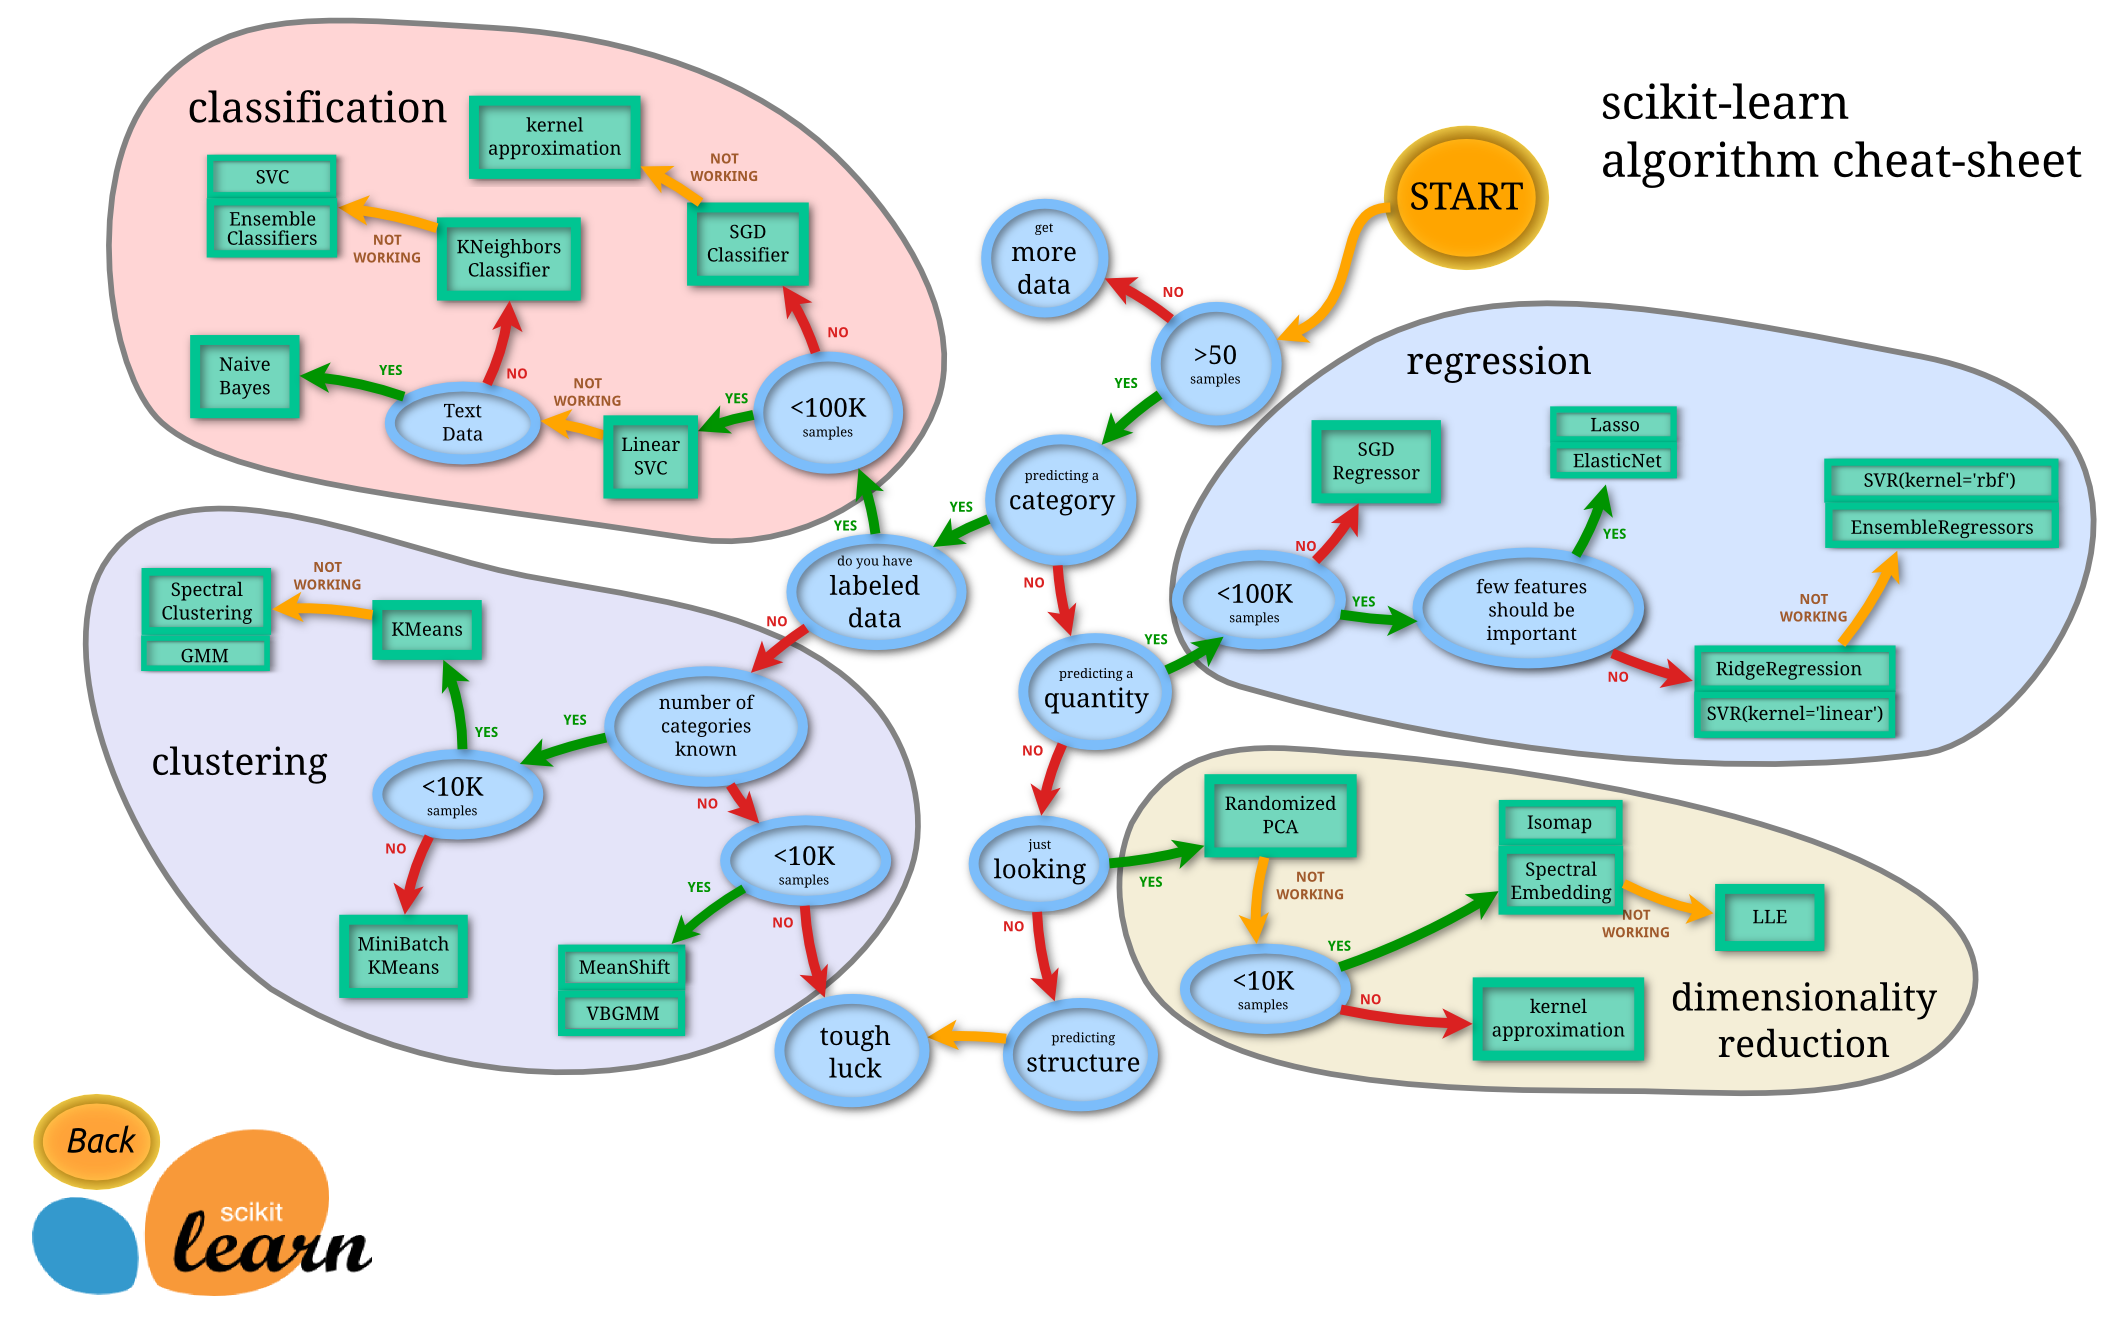

Where to get toy datasets? Checkout sklearn for datasets.

### 2.1 Picking a machine learning model for a regression model

In [139]:
# Get California housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [140]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [141]:
housing_df["MedHouseVal"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [142]:
print(housing["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [144]:
housing_df["target"] = housing["target"]
housing_df = housing_df.drop("MedHouseVal", axis=1)
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [146]:
# Import algo
from sklearn.linear_model import Ridge

# Setup seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in $100,000s

# Split our data in to X&y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit a model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Score the model
model.score(X_test, y_test)

0.5758549611440128

In this case, we're not so happy with the results so we would like to try different algorithms from the chart above to evalute which one is better.

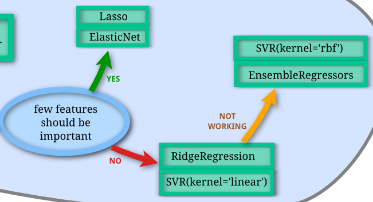

All these are different algorithms. To understand how they work, you might wanna do some research online. Additionally, you might want to checkout how the `.score()` function works to assess the estimator.

In [147]:
# Use RandomForestRegressor as the estimatorb
from sklearn.ensemble import RandomForestRegressor

# Setup seed
np.random.seed(42)

# Creat the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create the model and fit the data
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Score the model
model.score(X_test, y_test)

0.8066196804802649

In this case the `RandomForestRegressor` did a better job at predicting the house prices. This algorithm is based on decision trees. Decision trees consist of nodes and branches and one each node we apply one more more conditions to split the data. But, how does the algorithm actually do the splitting of data in different branches and nodes in the tree? In other words, how does the algorithm implement the `if... else if ... else` conditions?

![image.png](attachment:image.png)

According to the trainer, the algorithm is writing the code for the branches and nodes on the fly. That means that the algorithm is **learning** how to "better" split the data on the nodes so it can predict the target in a better way. The algorithm is learning how to optimize the `if... else if ... else` conditions on the data to better predict the target.

**Note**:

```text
Machine learning algorithms use computational methods to “learn” information directly from data without relying on a predetermined equation as a model. The algorithms adaptively improve their performance as the number of samples available for learning increases.
```
source: https://www.mathworks.com/discovery/machine-learning.html#:~:text=Machine%20learning%20algorithms%20use%20computational,specialized%20form%20of%20machine%20learning.

### 2.2 Picking a machine learning model for a classification model

In [151]:
# We're going to work on a classification problem - heart disease problem

heart_patients = pd.read_csv("../data/heart-disease.csv")
heart_patients.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [166]:
# The chart says to use LinearSVC
from sklearn.svm import LinearSVC

# Split data
X = heart_patients.drop("target", axis=1)
y = heart_patients["target"]

# Create datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create and fit the model
clf  = LinearSVC(max_iter=1000000, dual=False)
clf.fit(X_train, y_train)

# Score the model
clf.score(X_test, y_test)

0.8688524590163934

In [164]:
# Suppose this didn't work, the next classifier to try is RandomForestClassifier

# The chart says to use RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Split data
X = heart_patients.drop("target", axis=1)
y = heart_patients["target"]

# Create datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create and fit the model
clf2  = RandomForestClassifier()
clf2.fit(X_train, y_train)

# Score the model
clf2.score(X_test, y_test)

0.8360655737704918

**Tip**: which classifier to use?<br>
    1. if you have **structured data** => Use **ensemble methods**<br>
    2. if you have **unstructured data** => Use **deep learning** or **transfer learning**

---

## 3. Fit the model/algorithm and use it to make predictions

### 3.1 Fiting the model to the data

- `X` = features, feature variables, data<br>
- `y` = labels, targets, target variables

In [167]:
# The chart says to use RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Split data
X = heart_patients.drop("target", axis=1)
y = heart_patients["target"]

# Create datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create and fit the model
clf2  = RandomForestClassifier()
clf2.fit(X_train, y_train)

# Score the model
clf2.score(X_test, y_test)

0.8688524590163934

In [168]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [169]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

What does `.fit()` does actually do?
`.fit()` in a nutshell:
- the model will itterate over the train data in `X` - rows
- the model will itterate over the train data in `y` - rows
- the model will try to find a correlation -- a pattern -- between the data in the rows of `X` and their corresponding target values in `y`.

**This is response from a practical perspective.**

The scientific explanation requires studying the actual algorithms.

#### Random Forest model deep dive

These resources will help you understand what's happening inside the Random Forest models we've been using.

Random Forest Wikipedia - https://en.wikipedia.org/wiki/Random_forest
Random Forest Wikipedia (simple version) - https://simple.wikipedia.org/wiki/Random_forest
Random Forests in Python by yhat - http://blog.yhat.com/posts/random-forests-in-python.html
An Implementation and Explanation of the Random Forest in Python by Will Koehrsen - https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

### 3.2 Make predictions using a machine learning model (trained model!)

Use a trained model to make predictions.

2 ways to make predictions (by using the model):<br>
    1. `.predict()`<br>
    2. `.predict_proba()`

In [171]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3
191,58,1,0,128,216,0,0,131,1,2.2,1,3,3


In [175]:
# 1. use a trained model to make predictions - .predict()

clf2.predict(np.array([1, 7, 8, 3, 3])) # this should fail because the data is not in the correct form

/home/master/.pyenv/versions/miniconda3-latest/envs/pandas/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 3.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [176]:
# We could use our existing test set.
X_test.head()
# IF we want to make predictions, the data has to be in this shape.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3
191,58,1,0,128,216,0,0,131,1,2.2,1,3,3


In [177]:
clf2.predict(X_test)

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [179]:
np.array(y_test)

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0])

In [180]:
# Now we can compare the predicted to the truth labels to evaluate the model.
y_preds = clf2.predict(X_test)
np.mean(y_preds == y_test)

0.8688524590163934

In [181]:
clf2.score(X_test, y_test)

0.8688524590163934

So the `.mean()` and `.score()` functions do the same thing.
They evaluate the model!

There's another way to evaluate the accuracy of a model, see bellow.

In [183]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8688524590163934

So, these are 3 methods evaluate the accuracy of the model.

In [185]:
# 2. use a trained model to make predictions - .predict_proba()
clf2.predict_proba(X_test)[:5] # probability estimates, so percentages

array([[0.51, 0.49],
       [0.93, 0.07],
       [0.37, 0.63],
       [0.23, 0.77],
       [0.93, 0.07]])

In [188]:
# Predict on the same data
clf2.predict(X_test)[:5]

array([0, 0, 1, 1, 0])

Notice how **the higher probability determines the result of the prediction** of the model.

How can we use the information from `.predict_proba()`?

By looking into the probabilities of each sample we can **see or try to figure out -- based on the sample data -- why the model did or didn't perform well in its prediction**. If we wanted, we could also **filter the samples which were have a high -- or low prediction -- probability** and examine only those.

We can use the same methods on regression models.

In [189]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [197]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# fit the model to the data
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_preds = model.predict(X_test)

In [198]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [200]:
np.array([y_preds[:10]])

array([[0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
        2.34323  , 1.66182  , 2.47489  , 4.8344779]])

In [202]:
np.array([y_test[:10]])

array([[0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
        1.575  , 3.4    , 4.466  ]])

In [206]:
# Compare the predicted to the truth.
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)
# This shows by how much on average the predicted values are from from the true values.

0.3265721842781009

---

## 4. Evaluating a machine learning model

Three ways to evaluate a `sciki-learn` models/estimators:<br>

1. Estimator's build-in `.score()` method<br>
2. The `scoring` parameter<br>
3. Problem specific metric functions<br>
    
Ref: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with the `.score()` method

In [223]:
# Classification scoring
from sklearn.ensemble import RandomForestClassifier

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf_heart = RandomForestClassifier(n_estimators=1000)

clf_heart.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [224]:
clf_heart.score(X_test, y_test)

0.9344262295081968

In [228]:
# Regression scoring

from sklearn.ensemble import RandomForestRegressor

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regression_model = RandomForestRegressor(n_estimators=10)

regression_model.fit(X_test, y_test)

RandomForestRegressor(n_estimators=10)

In [230]:
# The default score() evaluation metric is r_squared for regression algorithms
# Highest = 1.0
# Lowest = 0.0
regression_model.score(X_test, y_test)

0.9524316910095258

### 4.2 Evaluating a model with the `scoring` parameter (cross-validation)

In [245]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf_heart = RandomForestClassifier(n_estimators=1000)

clf_heart.fit(X_train, y_train);

In [246]:
clf_heart.score(X_test, y_test)

0.819672131147541

In [247]:
cross_val_score(clf_heart, X, y, cv=5)
# This evaluates the score using cross validation.

array([0.83606557, 0.8852459 , 0.83606557, 0.8       , 0.78333333])

How does that look like?
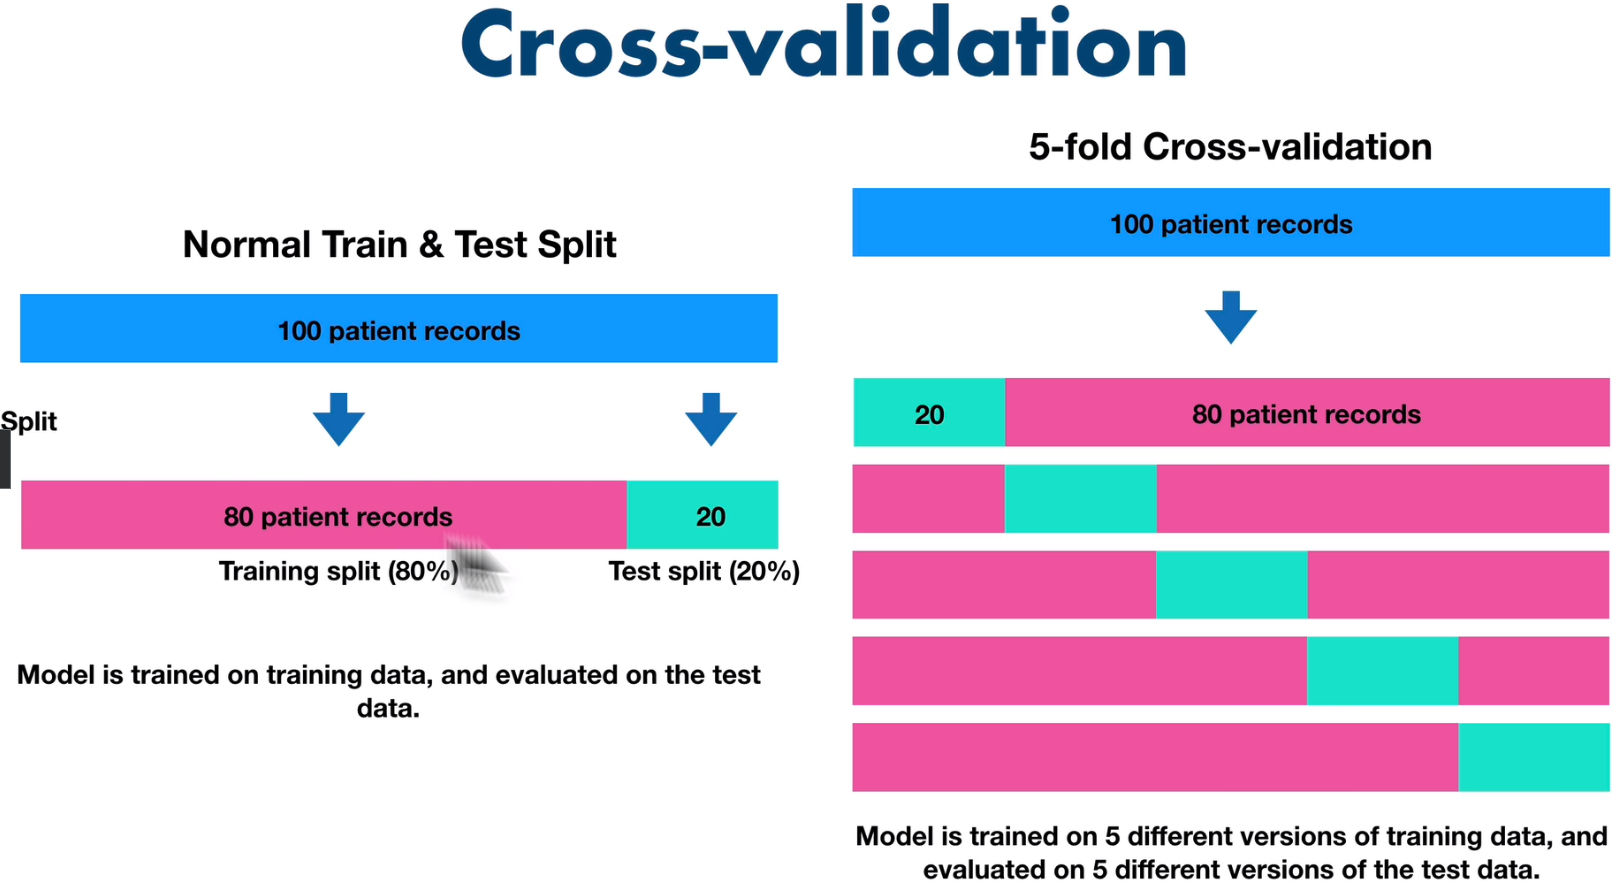

What this says is that the `cross_val_score()` function takes our model and refits it using different parts of the datasets `X` and `y`. So imagine having a shifting window in the dataset and each time the window selects different parts of the data set to be used for training and test. This windows is called a `fold`. So anytime you see `k-fold` it refers to the amount of crossvalidations. In our case `cv=5`.

Where crossvalidation might be useful?

**It could be that our split was lucky and our model got easy data to be trained on. So using `crossvalidation` we take different splits of the dataset to train and test our model and evaluate it.**

In [248]:
# take average of teh crossvalidation scores

np.random.seed(42)

# Single training and test split score
clf_single_score = clf_heart.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf_heart, X, y, cv=5))

# Comprae the two
clf_single_score, clf_cross_val_score

(0.819672131147541, 0.8215300546448088)

In [249]:
# Default scoring parameter of classifier == mean accuracy
clf_heart.score(X_test, y_test)

0.819672131147541

In [250]:
# Scoring parameter (default == None)
cross_val_score(clf_heart, X, y, scoring=None)

array([0.83606557, 0.8852459 , 0.80327869, 0.8       , 0.76666667])

#### 4.2.1 Classification model evaluation metrics

We're gonna cover other `scoring` methods for classification models.

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [296]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf_heart = RandomForestClassifier(n_estimators=1000)

clf_heart.fit(X_train, y_train);
cross_val_score = cross_val_score(clf_heart, X, y, cv=5)

In [312]:
np.mean(cross_val_score)

0.8281420765027322

In [313]:
print(f"Heart disease classifier cross-validated accuracy {np.mean(cross_val_score)*100:.2f}%")

Heart disease classifier cross-validated accuracy 82.81%


On average, our model has an 82% chance to predict the heart disease correctly on a random set of data.

**Area under ROC curve - Area under the Receiver Operating Characteristic**

- Area under curve (AUC)
- ROC curve

ROC curves are a comparison of a model's True Positive Rate (TPR) vs a model's False Positive Rate (FPR).

- True positive = model predicts 1 when truth is 1
- False positive = model predicts 1 when truth is 0
- True negative = model predicts 0 when truth is 0
- False negative = model predicts 0 when truth is 1

**ROC curves and AUC metrics are evaluation metrics for binary classification models** (a model which predicts one thing or another, such as heart disease or not).

The ROC curve compares the true positive rate (tpr) versus the false positive rate (fpr) at different classification thresholds.

Ref: https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

In [314]:
# Create X_test ...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.metrics import roc_curve

clf2.fit(X_train, y_train)

y_probs = clf2.predict_proba(X_test)
y_probs[:10]

array([[0.44, 0.56],
       [0.19, 0.81],
       [0.83, 0.17],
       [0.4 , 0.6 ],
       [0.09, 0.91],
       [0.  , 1.  ],
       [0.16, 0.84],
       [0.21, 0.79],
       [0.75, 0.25],
       [0.22, 0.78]])

In [315]:
# Grab only the positively predicted probabilities
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.56, 0.81, 0.17, 0.6 , 0.91, 1.  , 0.84, 0.79, 0.25, 0.78])

In [316]:
# Calculate fpt, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# False Positive Rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.06060606, 0.15151515, 0.15151515, 0.15151515, 0.15151515,
       0.18181818, 0.21212121, 0.21212121, 0.27272727, 0.39393939,
       0.42424242, 0.48484848, 0.54545455, 0.6969697 , 0.75757576,
       0.78787879, 0.87878788, 0.93939394, 1.        ])

In [317]:
# True Posivite Rates
tpr

array([0.        , 0.03571429, 0.07142857, 0.14285714, 0.28571429,
       0.32142857, 0.39285714, 0.42857143, 0.5       , 0.60714286,
       0.67857143, 0.67857143, 0.71428571, 0.78571429, 0.82142857,
       0.85714286, 0.85714286, 0.89285714, 0.92857143, 0.92857143,
       0.96428571, 0.96428571, 0.96428571, 0.96428571, 0.96428571,
       1.        , 1.        , 1.        , 1.        ])

In [318]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots an ROC curve given the False Positive Rate (FPR)
    and True Positive Rate (TPR) of a model.
    
    Compares the TPR with FPR.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    
    # Plot linew with no predictive power (50-50) - I think
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize plot
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("False Positive Rate (FPR)")
    plt.title("Receiver Operating Characteristic (ROC) curve")
    plt.legend()
    plt.show()


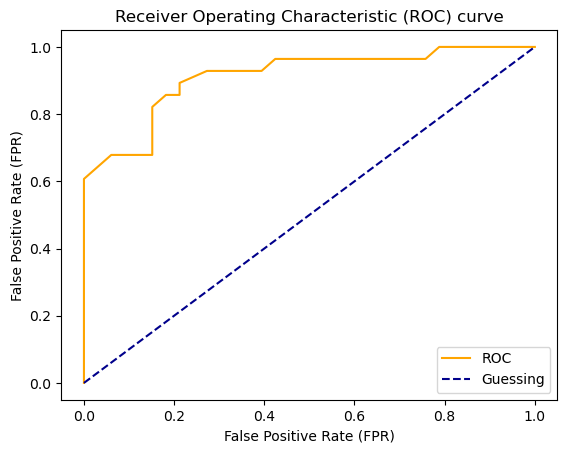

In [319]:
plot_roc_curve(fpr, tpr)

The **AUC metric tells you how well your model is at choosing between classes (for example, how well it is at deciding whether someone has heart disease or not)**. A perfect model will get an AUC score of 1.

In [320]:
from sklearn.metrics import roc_auc_score

# This is the AUC score
roc_auc_score(y_test, y_probs_positive)

0.9117965367965367

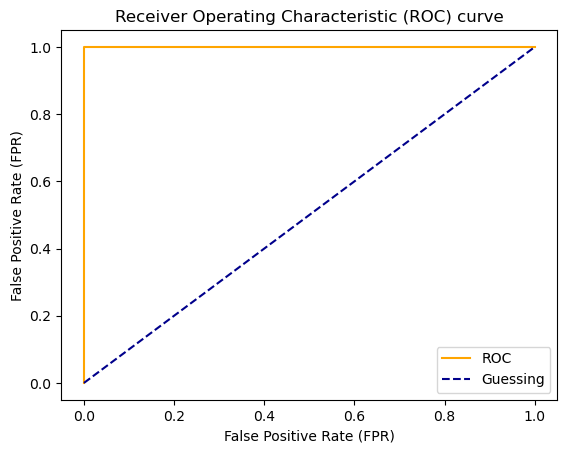

In [321]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [322]:
# Perfect AUC score = 1.0
roc_auc_score(y_test, y_test)

1.0

Further reading:<br>
- ROC and AUC, Clearly Explained! - https://www.youtube.com/watch?v=4jRBRDbJemM
- ROC documentation in Scikit-Learn - https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
- How the ROC curve and AUC are calculated - https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc